In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_str = 'COX'
main_model_name = 'main_model'
df = pd.read_csv('COX/dataset_may_2024.csv')
# df = pd.read_csv('COX/dataset.csv')
df.head()

,p3,p6,p5,p21,p26,p19,p9,p17,p14,p11,...,f14,f6,correct,pred,f7,f8,gt,f9,f10,f15
0,0.008464,0.072455,0.003781,0.151501,0.006755,0.006869,0.040526,0.011996,0.000687,0.000586,...,8.0,0.710648,False,9,2.0,1,53.0,2015.0,129436.0,8.0
1,0.283718,0.063355,0.043503,0.007972,0.004894,0.002789,0.002175,0.001925,0.000988,0.000886,...,11.5,0.710648,True,60,18.0,3,60.0,2015.0,129436.0,11.5
2,0.317367,0.058967,0.069528,0.008359,0.002327,0.000674,0.000592,0.002604,0.000914,0.000476,...,11.5,0.710648,False,60,18.0,35,25.0,2015.0,129436.0,11.5
3,0.283718,0.063355,0.043503,0.007972,0.004894,0.002789,0.002175,0.001925,0.000988,0.000886,...,7.6,0.710648,True,60,13.0,54,47.0,2015.0,129436.0,7.6
4,0.317367,0.058967,0.069528,0.008359,0.002327,0.000674,0.000592,0.002604,0.000914,0.000476,...,9.9,0.710648,False,60,16.0,30,14.0,2015.0,129436.0,9.9


In [26]:
df.shape

(102126, 53)

In [27]:
df.columns

Index(['p3', 'p6', 'p5', 'p21', 'p26', 'p19', 'p9', 'p17', 'p14', 'p11', 'p22',
       'p12', 'p10', 'p8', 'p18', 'p1', 'p4', 'p23', 'p15', 'p7', 'p25', 'p20',
       'p2', 'p16', 'p24', 'p30', 'p13', 'p31', 'p28', 'p29', 'p27', 'p0',
       'p33', 'p32', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f11', 'f12', 'f13',
       'f14', 'f6', 'correct', 'pred', 'f7', 'f8', 'gt', 'f9', 'f10', 'f15'],
      dtype='object')

In [28]:
data_with_gt = df[df['gt'].notna()]
data_with_gt.shape

(30304, 53)

In [29]:
data_with_gt['gt'].nunique()

38

In [47]:
print(sorted([int(x) for x in data_with_gt['gt'].unique()]))

[1, 5, 9, 10, 12, 13, 14, 16, 18, 21, 22, 25, 28, 30, 33, 34, 35, 37, 44, 45, 47, 52, 53, 59, 60, 61, 62, 68, 70, 72, 75, 76, 78, 80, 81, 83, 87, 93]


In [30]:
data_with_gt[data_with_gt['gt'] == data_with_gt['pred']].shape[0] / data_with_gt.shape[0] * 100

31.708685322069698

In [56]:
pd.Series(pd.factorize(data_with_gt['gt'])[0]).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

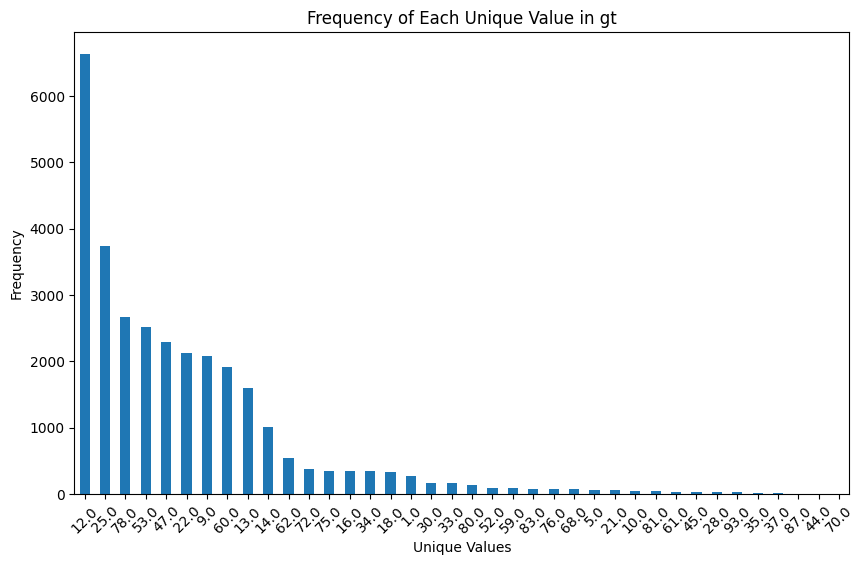

In [3]:
def plot_col_frequencies(df, col):
    frequency = df[col].value_counts()
    
    plt.figure(figsize=(10, 6))
    frequency.plot(kind='bar')
    plt.title(f'Frequency of Each Unique Value in {col}')
    plt.xlabel('Unique Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_col_frequencies(df, 'gt')

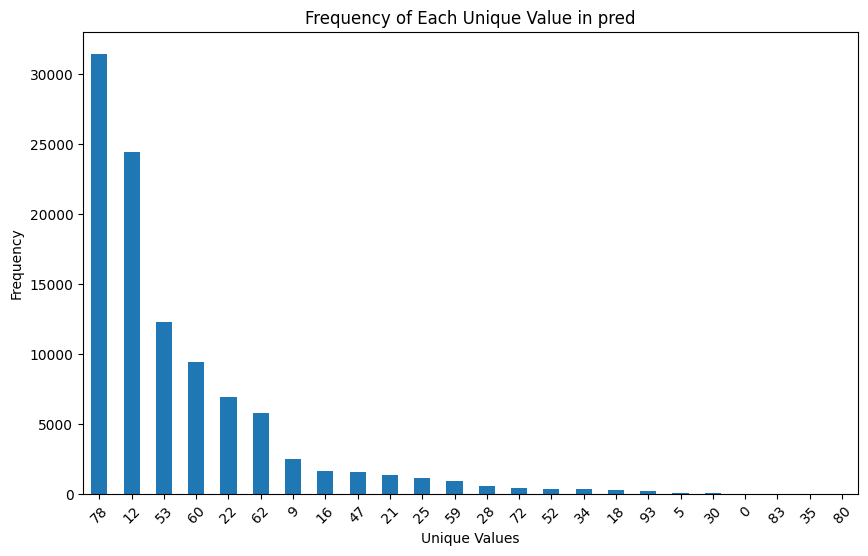

In [9]:
plot_col_frequencies(df, 'pred')

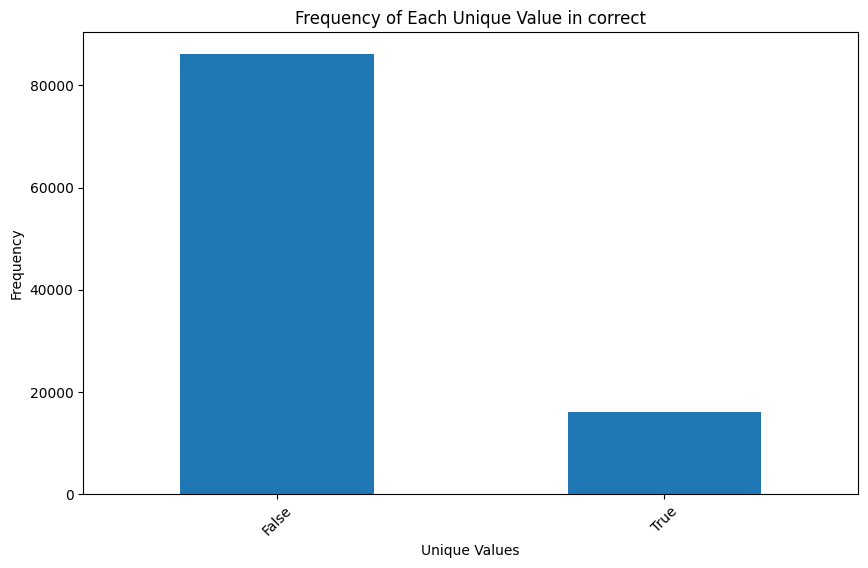

In [10]:
plot_col_frequencies(df, 'correct')